## Import the library

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv("..\\Dataset\\tel_churn.csv")

df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [3]:
df=df.drop('Unnamed: 0',axis=1)

### Seperatly store the dependent and Independent Variable 

In [4]:
## All the dependent variable store in the X 
x = df.drop('Churn' , axis= 1)

In [5]:
## Independent variable store in the value 
y = df['Churn']

## Train_Test_Split the data 

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Applying ML Models 

### Decision Tree Classifier

In [7]:
accuracy = []
model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "Gradient Boosting"]


In [8]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [9]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [10]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
acc = model_dt.score(x_test,y_test)

In [12]:
report = classification_report(y_test, y_pred, labels=[0,1])

print(report) 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



#### As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

#### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

#### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [13]:

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(x, y)



In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [15]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [16]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

accuracy.append(model_score_r)


0.9355932203389831
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       559
           1       0.94      0.94      0.94       621

    accuracy                           0.94      1180
   macro avg       0.94      0.94      0.94      1180
weighted avg       0.94      0.94      0.94      1180



In [17]:
print(metrics.confusion_matrix(yr_test, yr_predict))


[[523  36]
 [ 40 581]]


### After apply the Upsampling to the imbalance data Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

##  Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier



In [19]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(xr_train,yr_train)
y_pred=model_rf.predict(xr_test)


In [20]:
acc = model_rf.score(xr_test,yr_test)
accuracy.append(acc)


print(acc)

0.9440677966101695


In [21]:
print(classification_report(yr_test, y_pred, labels=[0,1]))



              precision    recall  f1-score   support

           0       0.95      0.93      0.94       559
           1       0.94      0.95      0.95       621

    accuracy                           0.94      1180
   macro avg       0.94      0.94      0.94      1180
weighted avg       0.94      0.94      0.94      1180



## Logistic Regression 

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
model_lr = LogisticRegression(random_state=42, max_iter=1000)


In [24]:
model_rf.fit(xr_train, yr_train)
y_pred_rf = model_rf.predict(xr_test)
acc_rf = model_rf.score(xr_test, yr_test)
accuracy.append(acc_rf)

print(acc_rf)

0.9440677966101695


In [25]:
print("LogisticRegression Classification :")
print(classification_report(yr_test, y_pred_rf, labels=[0, 1]))

LogisticRegression Classification :
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       559
           1       0.94      0.95      0.95       621

    accuracy                           0.94      1180
   macro avg       0.94      0.94      0.94      1180
weighted avg       0.94      0.94      0.94      1180



### GradientBoostingClassifier

In [26]:
from sklearn.ensemble import  GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(xr_train, yr_train)
y_pred_gb = model_gb.predict(xr_test)
acc_gb = model_gb.score(xr_test, yr_test)
accuracy.append(acc_gb)

print(acc_gb)



0.961864406779661


In [27]:
print("Gradient Boosting Classification Report:")
print(classification_report(yr_test, y_pred_gb, labels=[0, 1]))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       559
           1       0.96      0.96      0.96       621

    accuracy                           0.96      1180
   macro avg       0.96      0.96      0.96      1180
weighted avg       0.96      0.96      0.96      1180



## Model comparison

Decision Tree Accuracy: 0.9355932203389831
Random Forest Accuracy: 0.9440677966101695
Logistic Regression Accuracy: 0.9440677966101695
Gradient Boosting Accuracy: 0.961864406779661


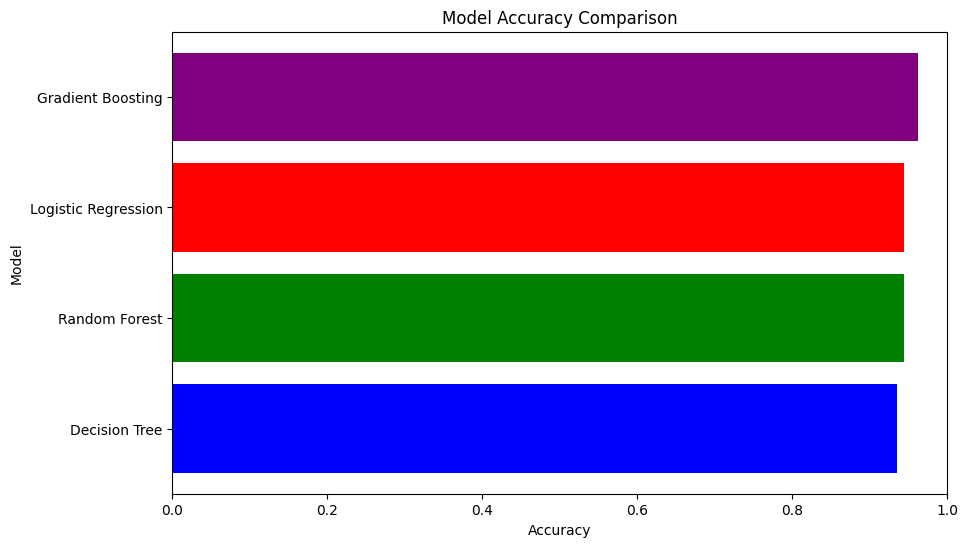

In [28]:
# Convert the accuracy list to a numpy array
accuracy = np.array(accuracy)

# Print the accuracies
for model, acc in zip(model_names, accuracy):
    print(f"{model} Accuracy: {acc}")

# Plotting the accuracies as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

## After training and evaluating multiple machine learning models, it is concluded that the **Gradient Boosting Classifier** performs the best for this dataset, based on the accuracy scores obtained.






 